<a href="https://colab.research.google.com/github/vibha-sanghani/EDA-AirBnb-Bookings-Analysis/blob/main/Vibha_EDA_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AirBnb Bookings Analysis


##### **Project Type**    - Exploratory Data Analysis
##### **Contribution**    - Individual


# **Project Summary -**

This project focuses on analyzing a dataset comprising approximately 49,000 observations. The primary objective is to uncover valuable insights that can guide management and stakeholders in making informed decisions to drive business growth. By identifying trends and patterns within the data, actionable recommendations can be formulated to improve and expand the business. This analysis benefits both guests and hosts by providing insights to help guests make informed choices and guiding hosts on necessary improvements to enhance their offerings and achieve sustainable growth. Key information provided includes:

*   Listing Counts
*   Data Distributed as per specific neighborhood groups
*   Prices
*   Reviews data
*   Room Type Preference

Using this information we will be able to seek insights like:-

*   Preference of the guests for their hosts
*   Room-Type preference
*   Prefered Price range
*   Most preferred neighborhood

This project involves diving deep into a rich dataset of nearly 49,000 observations to uncover actionable insights that drive growth and innovation. The ultimate goal is to empower stakeholders with a clear understanding of the trends and patterns shaping the business landscape. By analyzing this data, we aim to create a personalized experience for our guests and provide meaningful guidance to our hosts, enabling them to cater to specific needs more effectively.

One key outcome will be the development of a dynamic filtering system that allows guests to discover listings tailored to their budget and preferences. Simultaneously, hosts will be ranked based on their ability to meet guest requirements, fostering healthy competition and encouraging improvements. This dual-sided approach ensures an enhanced guest experience and actionable insights for hosts to refine their offerings, ultimately driving satisfaction and loyalty.

From a technical perspective, data wrangling will play a critical role, with Pandas as the backbone for cleaning, organizing, and structuring the dataset. For numerical computations and ranking algorithms, NumPy will enable efficient array operations and seamless handling of numerical data. To communicate our findings effectively, we will leverage the power of Matplotlib and Seaborn to craft visually compelling stories from the data, ensuring stakeholders grasp insights effortlessly.

Beyond the technical scope, this project is a valuable learning experience. By simulating a real-world business scenario, I will gain insights into the operational models of this field, from problem identification to crafting practical solutions. Developing a strategic mindset, mastering the utilization of Python libraries, and applying complex concepts creatively will be essential milestones.

Ultimately, this project is not just about data analysis—it's about transforming raw numbers into meaningful narratives that guide decision-making and fuel growth. It’s an opportunity to polish my critical thinking, enhance my storytelling with data, and prepare for solving real-world business challenges effectively.





# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The task of this project is to derive insights from the given dataset so that it can be used by the stake holders for business improvements

#### **Define Your Business Objective?**

The business objective of this project is to identify opportuinites of improvements and also to derive patterns and insights of customer's preference which will ultimately help us in achieving customer satisfaction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [338]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns
import openpyxl
pd.set_option('display.max_columns', 200)

### Dataset Loading

In [339]:
# Load Dataset
# df_airbnb = pd.DataFrame(pd.read_csv("Airbnb NYC 2019.csv"))
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/AlmaBetter Project/M2-Project/Airbnb NYC 2019.csv'

df_airbnb = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [340]:
# Dataset First Look
df_airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Above is an initial glimpse of the dataset we will be working with. Let us now delve deeper into the data to explore its structure and uncover meaningful insights.



In [341]:
#check for all the columns we have in our dataset.
df_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Here is a comprehensive overview of all the columns present in our dataset.

### Dataset Rows & Columns count

In [342]:
# Dataset Rows & Columns count
df_airbnb.shape

(48895, 16)

Examining the shape of the dataset reveals a substantial number of rows compared to columns, indicating a robust dataset. Specifically, it comprises:

Rows: 48,895
Columns: 16

### Dataset Information

In [343]:
# Dataset Info
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     


The dataset demonstrates a clear division between numerical and categorical variables, summarized as follows:
* **Numerical Data:**
  *   3 colums with float64 data type
  *   7 columns with int64 data type
* **Categorical Data:**
  * 6 columns with object data type.



#### Duplicate Values

In [344]:
# Dataset Duplicate Value Count
df_airbnb.duplicated().sum()

0

From this analysis, we observe that there are no exact duplicate values present in the dataset.

In [345]:
# Converting the 'last_review' column in a datetime format.
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'],errors='coerce')
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [346]:
# Now let us sort the data by the last_review column
df_airbnb = df_airbnb.sort_values(by='last_review', ascending=False).reset_index(drop=True)
df_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.00,1,1
1,33119863,Queens Studio.,42540127,Tio,Queens,Bayside,40.77067,-73.78278,Entire home/apt,55,2,37,2019-07-08,10.37,1,6
2,34244391,A space like a home,258536261,Judy,Brooklyn,Cypress Hills,40.67959,-73.88302,Entire home/apt,100,2,11,2019-07-08,5.69,1,179
3,34231172,Fully renovated brick house floor in Brooklyn,59642348,Kevin,Brooklyn,Sunset Park,40.64550,-74.01262,Entire home/apt,95,1,9,2019-07-08,9.00,1,106
4,34204893,Gorgeous spacious 1 bedroom apartment,85773188,Mark,Brooklyn,Brighton Beach,40.57589,-73.96636,Entire home/apt,86,1,10,2019-07-08,9.09,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


As we can see there are few NA values in our dataframe in the date column let's fill these values with the latest dates we are having in our dataframe.

In [347]:
# Replacing NA Values
df_airbnb['last_review'].replace(np.nan,df_airbnb['last_review'].max(), inplace=True)

# Let's sort the values again
df_airbnb = df_airbnb.sort_values(by='last_review', ascending=False).reset_index(drop=True)
df_airbnb

<ipython-input-347-121ecb81b3fa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_airbnb['last_review'].replace(np.nan,df_airbnb['last_review'].max(), inplace=True)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.00,1,1
1,15968426,Comfy spacious Astoria aptmt 15m from Manhattan,2753243,Jwanah,Queens,Astoria,40.76248,-73.92422,Private room,56,3,0,2019-07-08,NaN,1,0
2,16000062,Charming Carriage House near Prospect Park,4366974,Ariana,Brooklyn,Crown Heights,40.67320,-73.96195,Entire home/apt,300,7,0,2019-07-08,NaN,1,0
3,15998231,Cozy Room in Brownstone,20327528,Miller,Brooklyn,Bedford-Stuyvesant,40.68631,-73.95597,Private room,35,3,0,2019-07-08,NaN,1,0
4,15987034,near Williamsburg/Manhattan/ Greenpoint - 1 b/1b,19803201,Gino,Brooklyn,Greenpoint,40.72388,-73.94040,Entire home/apt,150,3,0,2019-07-08,NaN,2,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
48891,28396,Modern Apt with Spectacular Views,6197784,Jo,Brooklyn,Williamsburg,40.71923,-73.96468,Private room,90,1,9,2011-09-18,0.08,1,245
48892,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
48893,40039,Luxurious Condo in DUBMO with View,171851,Henry,Brooklyn,DUMBO,40.70207,-73.98571,Private room,250,3,14,2011-04-25,0.13,1,189


In [348]:
# Dropping duplicated values
df_airbnb = df_airbnb.drop_duplicates(subset=['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type'], keep='first').reset_index(drop=True)

df_airbnb.shape # (48662, 16)

# Let's check if there are any duplicated values now
df_airbnb[df_airbnb.duplicated(subset=['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type'])] # No values
df_airbnb.duplicated().sum() # 0 duplicate

0

We have successfully dropped the duplicated values and now we only have latest data values.

In [349]:
# Missing Values/Null Values Count
null_values_count = df_airbnb.isnull().sum()

# Visualizing the missing values
null_values_count


,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


As we can see we were having missing values in name and host_name columns, however as we are having their respective ids we will still be able to manage the data, however let us check for outliers.

In [350]:
# drop null value column
df_airbnb.dropna(subset=['name', 'host_name'], inplace=True)
df_airbnb.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


I dropped the row data in the name and host_name columns because they had 16 and 22 missing values, which is a low amount of NaN data.

In [351]:
# fill NAN Values into 0 in review per month
df_airbnb['reviews_per_month'].fillna(0, inplace=True)
df_airbnb.isnull().sum()

<ipython-input-351-821586803ff3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_airbnb['reviews_per_month'].fillna(0, inplace=True)


,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


For the reviews_per_month column, I handled the missing value in row 9974 by filling it with 0.

In [352]:
# To check the outliers we need to check the columns which are having numerical data.
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.862500e+04,4.862500e+04,48625.000000,48625.000000,48625.000000,48625.000000,48625.000000,48625,48625.000000,48625.000000,48625.000000
mean,1.901106e+07,6.747408e+07,40.728918,-73.952197,152.677841,6.984596,23.336411,2018-11-30 04:38:54.502827776,1.092918,6.993769,112.344925
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.466003e+06,7.801481e+06,40.689980,-73.983060,69.000000,1.000000,1.000000,2018-11-04 00:00:00,0.040000,1.000000,0.000000
50%,1.967009e+07,3.070623e+07,40.722980,-73.955660,105.000000,3.000000,5.000000,2019-06-14 00:00:00,0.370000,1.000000,44.000000
75%,2.914483e+07,1.074344e+08,40.763130,-73.936270,175.000000,5.000000,24.000000,2019-07-04 00:00:00,1.590000,2.000000,225.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098000e+07,7.852736e+07,0.054566,0.046101,240.497209,20.042790,44.627588,NaN,1.597842,32.496596,131.405735


If we look into this data we can see that the price and the minimum_nights columns are the most concerning ones, in these 2 columns we need to find the outliers and drop them.

In [353]:
# As we see above the column_name 'calculated_host_listings_count' is quiet long
# Let's change it to 'listings'
df_airbnb.rename(columns={
    "calculated_host_listings_count": 'listings'
}, inplace=True)

# Lets check the price columns once
df_airbnb['price'].describe()

# As we can see the min price is 0 which is not likely to happen.
# According to the current website the price range starts from $25.
# In this case we will check for the prices which are below $25 and we will
# replace their values with 25 so that we can handle the outliers in price column.

df_airbnb['price'].replace(range(0, 25), 25, inplace=True) # replacing values
df_airbnb['price'].describe()

<ipython-input-353-0b0c38e018fb>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_airbnb['price'].replace(range(0, 25), 25, inplace=True) # replacing values


,price
count,48625.000000
mean,152.699476
std,240.485100
min,25.000000
25%,69.000000
50%,105.000000
75%,175.000000
max,10000.000000


As the few price values were less than $25, which is not likely to happen, we have converted those values into 25, so that we may handle the outliers more efficiently, as there was other crucial info present in those rows.

In [354]:
# Now let's check the minimum_nights column.
df_airbnb['minimum_nights'].describe()

# As the minimum value in this column is 1, we can work on only the upper limit.
# In this case if any value is more than 365 days, we will mark it as 365.

df_airbnb['minimum_nights'].replace(range(366, 1251), 365, inplace=True) # replacing values
df_airbnb['minimum_nights'].describe()

<ipython-input-354-b2049291fe1b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_airbnb['minimum_nights'].replace(range(366, 1251), 365, inplace=True) # replacing values


,minimum_nights
count,48625.000000
mean,6.910190
std,17.474274
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,365.000000


Now we have modified the outliers, we can move ahead with our dataset ready to be wrangled for deriving insights.

### What did you know about your dataset?


The Airbnb NYC 2019 dataset contains 48,895 rows and 16 columns. It includes both numerical and categorical data, with 3 columns of float64, 7 columns of int64, and 6 columns of object data types. The primary key is the "id" column, which uniquely identifies the hotel listings.

The columns in the dataset are as follows:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

This dataset had no exact duplicated values.In our dataset we were able to use the 'last_review' column as the timestamp for our dataset.

The dataset had missing values primarily in last_review and reviews_per_month (9989 missing entries). For missing last_review, we replaced the NA values with the most recent date available. Additionally, there were a few missing values in the name (16) and host_name (21) columns.

After addressing these issues, the dataframe is now cleaned and ready for data wrangling.

## ***2. Understanding Your Variables***

In [355]:
# Dataset Columns
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings,availability_365
0,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.0,1,1
1,15968426,Comfy spacious Astoria aptmt 15m from Manhattan,2753243,Jwanah,Queens,Astoria,40.76248,-73.92422,Private room,56,3,0,2019-07-08,0.0,1,0
2,16000062,Charming Carriage House near Prospect Park,4366974,Ariana,Brooklyn,Crown Heights,40.67320,-73.96195,Entire home/apt,300,7,0,2019-07-08,0.0,1,0
3,15998231,Cozy Room in Brownstone,20327528,Miller,Brooklyn,Bedford-Stuyvesant,40.68631,-73.95597,Private room,35,3,0,2019-07-08,0.0,1,0
4,15987034,near Williamsburg/Manhattan/ Greenpoint - 1 b/1b,19803201,Gino,Brooklyn,Greenpoint,40.72388,-73.94040,Entire home/apt,150,3,0,2019-07-08,0.0,2,364


In [356]:
# Dataset Columns
df_columns = df_airbnb.columns
df_columns # All the columns of our cleaned data.

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'listings', 'availability_365'],
      dtype='object')

There are basically 3 types of variables according to their roles:-

* Numerical Variables: These variables represent quantitative data and can be further categorized into:-
 * Continuous Variables: These variables can take any value within the given
   number of range.
 * Discrete Variables: These variables are having a specific value and are
   related to a specific identity.
* Categorical Variables: These variables represent qualitative data and can be further categorized into:-
 * Nominal Variables: These variables are random and they do not follow any
   order or ranking.
 * Ordinal Variables: These variables are according to an order they can be
   ranked as well.

* Time Variables: These variables are basically date and time variables having a timestamp.

In [357]:
# Dataset Describe
df_describe = df_airbnb.describe()
df_describe # These are all the numerical variables in our dataset.

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings,availability_365
count,4.862500e+04,4.862500e+04,48625.000000,48625.000000,48625.000000,48625.000000,48625.000000,48625,48625.000000,48625.000000,48625.000000
mean,1.901106e+07,6.747408e+07,40.728918,-73.952197,152.699476,6.910190,23.336411,2018-11-30 04:38:54.502827776,1.092918,6.993769,112.344925
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,25.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.466003e+06,7.801481e+06,40.689980,-73.983060,69.000000,1.000000,1.000000,2018-11-04 00:00:00,0.040000,1.000000,0.000000
50%,1.967009e+07,3.070623e+07,40.722980,-73.955660,105.000000,3.000000,5.000000,2019-06-14 00:00:00,0.370000,1.000000,44.000000
75%,2.914483e+07,1.074344e+08,40.763130,-73.936270,175.000000,5.000000,24.000000,2019-07-04 00:00:00,1.590000,2.000000,225.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098000e+07,7.852736e+07,0.054566,0.046101,240.485100,17.474274,44.627588,NaN,1.597842,32.496596,131.405735


### Variables Description

The dataset provides various outputs that can help derive key insights. For instance, while the price range is broad, the average price preferred by customers is around 150, offering insight into guest budgets and preferences.

### Check Unique Values for each variable.

In [358]:
# Check Unique Values for each variable.
def unique_value(df):
  for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

## 3. ***Data Wrangling***

### Data Wrangling Code

As our Data cleaning, Data transformation, and Handling outliers has been completed, now we will be working on "Feature Engineering".

In [359]:
# Let's create a new column with the price range distribution.
# We will use it while working with the price column.
start = 0
end = 10000
breakpoints = np.linspace(start, end, num=101)
breakpoints = breakpoints.astype(int)
def price_range(amt):
    bp = breakpoints
    for i in range(len(breakpoints)-1):
        if bp[i] <= amt <= bp[i+1]:
            return f"{bp[i]} - {bp[i+1]}"


df_airbnb['price_range'] = df_airbnb['price'].apply(lambda amt: price_range(amt))
df_airbnb['price_range']

,price_range
0,0 - 100
1,0 - 100
2,200 - 300
3,0 - 100
4,100 - 200
...,...
48657,0 - 100
48658,100 - 200
48659,0 - 100
48660,200 - 300


Creating a price range column offers several advantages that enhance data analysis and decision-making:

* Data Summarization: By grouping prices into ranges, we gain a clearer and more concise summary of the dataset's price distribution.

* Improved Visualization: Representing data through price ranges makes visualizations more effective and easier to interpret compared to analyzing individual price points.

* Segmentation and Analysis: Dividing prices into ranges enables straightforward comparisons between different segments, making it easier to identify patterns and trends.

* Informed Decision-Making: Price ranges support better decision-making by providing insights that can guide recommendations based on customer budgets and requirements.

* Insight Communication: Using price ranges simplifies the process of communicating customer preferences and purchasing power. It also highlights where the majority of customers fall within the price spectrum, aiding in targeted strategies.

In [360]:
# Let's take a glance at our dataset once.
df_airbnb.head()

# As we can see our dataset is sorted according to the last review, let us sort our dataset according to the price.
df_airbnb.sort_values(by='price', ascending=False, inplace=True)

# Let's take a look at our price sorted dataset once.
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings,availability_365,price_range
46635,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,9900 - 10000
1809,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,2019-07-08,0.00,1,83,9900 - 10000
42906,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0,9900 - 10000
9953,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,2019-07-08,0.00,1,365,9900 - 10000
46974,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83,9900 - 10000


In [361]:
# Check our columns and filter those columns that will work as our features.
df_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'listings', 'availability_365', 'price_range'],
      dtype='object')

In [362]:
# Let's filter the dataframe with only the required columns.
df_feature = df_airbnb[['id', 'name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'listings',
       'availability_365', 'price_range']]
df_feature=df_feature.reset_index(drop=True)
df_feature.head()

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,listings,availability_365,price_range
0,7003697,Furnished room in Astoria apartment,20582832,Queens,Astoria,Private room,10000,100,2,0.04,1,0,9900 - 10000
1,22436899,1-BR Lincoln Center,72390391,Manhattan,Upper West Side,Entire home/apt,10000,30,0,0.00,1,83,9900 - 10000
2,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Brooklyn,Greenpoint,Entire home/apt,10000,5,5,0.16,1,0,9900 - 10000
3,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Manhattan,Lower East Side,Entire home/apt,9999,30,0,0.00,1,365,9900 - 10000
4,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Manhattan,Lower East Side,Private room,9999,99,6,0.14,1,83,9900 - 10000


This dataset contains several distinct groups. Let's explore these groups further to uncover meaningful insights by analyzing the information specific to each group.

In [363]:
# Let's check the top performing Host as per the total listing count
host_groups = df_feature.groupby('name')
hosts = []
no_of_listings = []
host_prices = []
for host, data in host_groups:
  hosts.append(host)
  no_of_listings.append(data['listings'].sum())
  host_prices.append(data['price'].mean())

host_df = pd.DataFrame({
    'Host Name': hosts,
    'Total Listings': no_of_listings,
    'Price': host_prices
})
host_df = host_df.sort_values(by='Total Listings', ascending=False).reset_index(drop=True)
host_df = host_df.drop_duplicates(subset='Total Listings').reset_index(drop=True)
top_10_hosts = host_df.head(10)

host_df['Revenue'] = (host_df['Total Listings'])*(host_df['Price'])
top_host_revenue = host_df.sort_values(by='Revenue', ascending=False).reset_index(drop=True)
top_host_revenue.head(10)

,Host Name,Total Listings,Price,Revenue
0,Pleasant 1BR in Midtown East by Sonder,654,197.000000,128838.0
1,Sonder | Stock Exchange | Sunny 1BR + Laundry,327,228.000000,74556.0
2,"West 55th street, Lux 1bd Serviced Apartment",261,251.666667,65685.0
3,Snazzy Wall Street Studio w/ Lux gym + Roof de...,232,251.000000,58232.0
4,West 15th Street Cozy Chelsea 1bd Serviced Apt,174,200.000000,34800.0
5,*NO GUEST SERVICE FEE* Beekman Tower Premium S...,49,699.000000,34251.0
6,Sleek 1 BR apt. near major attractions in NYC!,121,239.000000,28919.0
7,TRUE2BR-PRIME MIDTOWN EAST~53rd&3rd,114,232.500000,26505.0
8,2BR ON MIDTOWN EAST~EAST 34TH STREET,65,350.000000,22750.0
9,32 FLR VIEWS!LINCOLN SQR-LUXURY MIDTOWN WEST 60TH,98,229.500000,22491.0


In [364]:
# First we check how many neighbourhood_groups are there.
df_feature['neighbourhood_group'].unique() # There are 5 different neighbourhood groups.
# ['Queens', 'Manhattan', 'Brooklyn', 'Staten Island', 'Bronx']

n_groups=df_feature.groupby('neighbourhood_group')
n_groups

# Let's check which group is most prefered as per the listings, and no. of reviews.
groups = [] # To save the groups
listings = []
reviews = []
max_price = []
min_price = []
for group, data in n_groups:
  groups.append(group)
  listings.append(data['listings'].sum())
  reviews.append(data['number_of_reviews'].sum())
  max_price.append(data['price'].max())
  min_price.append(data['price'].min())

df_neighbour_group = pd.DataFrame({
    'Group': groups,
    'Listing Count': listings,
    'No._of_reviews': reviews,
    'Min Price': min_price,
    'Max Price': max_price
})

df_neighbour_group

,Group,Listing Count,No._of_reviews,Min Price,Max Price
0,Bronx,2408,28289,25,2500
1,Brooklyn,44959,484688,25,10000
2,Manhattan,269266,453521,25,10000
3,Queens,22575,156695,25,10000
4,Staten Island,864,11540,25,5000


Here we can see that Manhattan group is the most prefered group as per the listings.However the most reviews are given to the Brooklyn group.


In [365]:
# Now let's divide our dataset as per the room types, and create their groups.
# Check how room_types are there.

df_feature['room_type'].unique() # There are 3 room types.
# ['Entire home/apt', 'Private room', 'Shared room']

#  let's group our dataset according to the room types.
room_groups = df_feature.groupby('room_type')
rooms = []
room_listings = []
room_reviews = []
max_room_price = []
min_room_price = []
for room_type, room_data in room_groups:
    rooms.append(room_type)
    room_listings.append(room_data['listings'].sum())
    max_room_price.append(room_data['price'].max())
    min_room_price.append(room_data['price'].min())

df_room_group = pd.DataFrame({
    'Group': rooms,
    'Listing Count': room_listings,
    'Min Price': min_room_price,
    'Max Price': max_room_price
})

df_room_group


,Group,Listing Count,Min Price,Max Price
0,Entire home/apt,263964,25,10000
1,Private room,70786,25,10000
2,Shared room,5322,25,1800


It is evident that the most preferred room type is the "Entire home/apt," which also receives the highest number of reviews. On the other hand, "Shared rooms" are the least preferred option.

In [366]:
# Now let us check how many different neighbourhoods are there in total.
df_feature['neighbourhood'].count() # there are 48662 neighbourhoods

48625

In [367]:
# Now let us check what are the top 10 most prefered neighbourhoods.
# Also, let's check their average pricing and average price range.
area_groups = df_feature.groupby('neighbourhood')
areas = []
listing_count = []
avg_price = []
for area, n_data in area_groups:
  areas.append(area)
  listing_count.append(n_data['listings'].sum())
  avg_price.append(round(n_data['price'].mean(), 2))

df_area = pd.DataFrame({
    'Area': areas,
    'Listing Count': listing_count,
    'Average Price': avg_price,
})

df_area = df_area.sort_values(by='Listing Count', ascending=False).reset_index(drop=True).head(10)
df_area

,Area,Listing Count,Average Price
0,Financial District,84942,226.03
1,Hell's Kitchen,24744,205.47
2,Murray Hill,24726,221.18
3,Midtown,24647,282.66
4,Chelsea,17482,248.38
5,Theater District,16151,242.67
6,Upper East Side,14908,189.02
7,Upper West Side,13198,211.32
8,Bedford-Stuyvesant,9604,107.78
9,Tribeca,7519,492.23


In [368]:
# To analyze the relationship between price and room type,
#'ll examine the price distribution for each room type.
# Using the grouped DataFrame room_groups,
# we calculate the average price for each room type as follows:

# Calculate the average price for each room type
avg_prices = [data['price'].mean() for room, data in room_groups]

# Create a new DataFrame to store the results
room_vs_price = pd.DataFrame({
    'Room Type': rooms,
    'Avg Price': avg_prices
})

room_vs_price

,Room Type,Avg Price
0,Entire home/apt,211.705296
1,Private room,89.644552
2,Shared room,70.484822


As observed, the "Entire home/apt" has the highest average pricing compared to other room types.

In [369]:
# Relationship: Reviews per Month vs. Room Type
total_room =[data['reviews_per_month'].sum() for room, data in room_groups]
room_vs_reviews = pd.DataFrame({
    'Room Type': rooms,
    'Total Reviews': total_room
})

room_vs_reviews

,Room Type,Total Reviews
0,Entire home/apt,26513.48
1,Private room,25397.03
2,Shared room,1232.65


By analyzing the room_vs_reviews DataFrame, we can see the total number of reviews per month for each room type. As observed, the "Entire home/apt" has the highest number of reviews.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-370-7ac1d04f7543>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_10_years['review_year'] = df_last_10_years['last_review'].dt.year


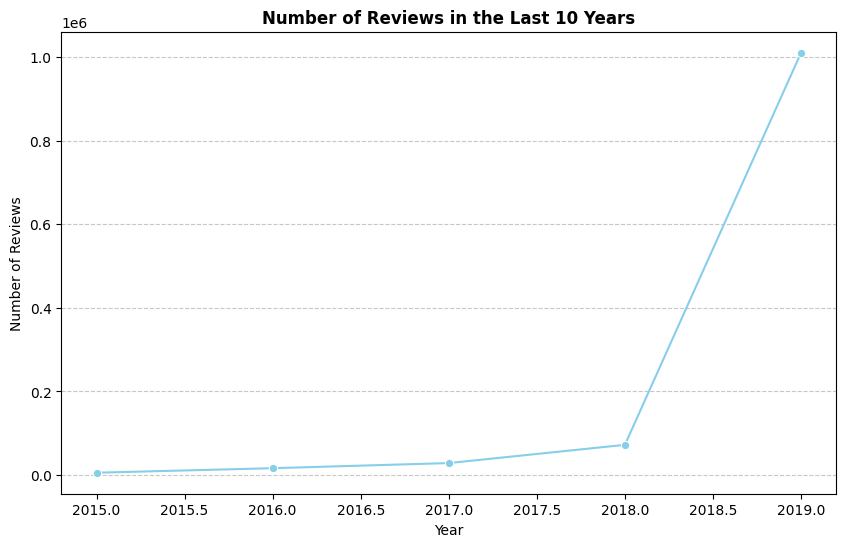

In [370]:
# Chart - 1 visualization code : Line Chart # check number of reviews base on last review in 10 years


# Filter reviews from the last 10 years
current_date = pd.Timestamp.now()
cutoff_date = current_date - pd.DateOffset(years=10)
df_last_10_years = df_airbnb[df_airbnb['last_review'] >= cutoff_date]

# Extract the year from the 'last_review' column
df_last_10_years['review_year'] = df_last_10_years['last_review'].dt.year

# Count the number of reviews per year
# reviews_per_year = df_last_10_years['review_year'].value_counts().sort_index()

# Group by year and sum 'number_of_reviews'
reviews_per_year=df_last_10_years.groupby('review_year')['number_of_reviews'].sum()

# Plot the results in line graph
plt.figure(figsize=(10, 6))
# reviews_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
sns.lineplot(x=reviews_per_year.index, y=reviews_per_year.values, marker='o', color='skyblue')
plt.title('Number of Reviews in the Last 10 Years', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Reviews', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 1. Why did you pick the specific chart?

A line chart is a good choice to visualize trends over time. In this case, the chart is used to see how the number of reviews has changed over the past 10 years.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the number of reviews has fluctuated over the past 10 years, but there is no clear upward or downward trend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can help create a positive business impact. For example, if the business can identify what is driving the fluctuations in the number of reviews, they can take steps to increase the number of positive reviews. However, there is no evidence to suggest that the current number of reviews is leading to negative growth.

#### Chart - 2

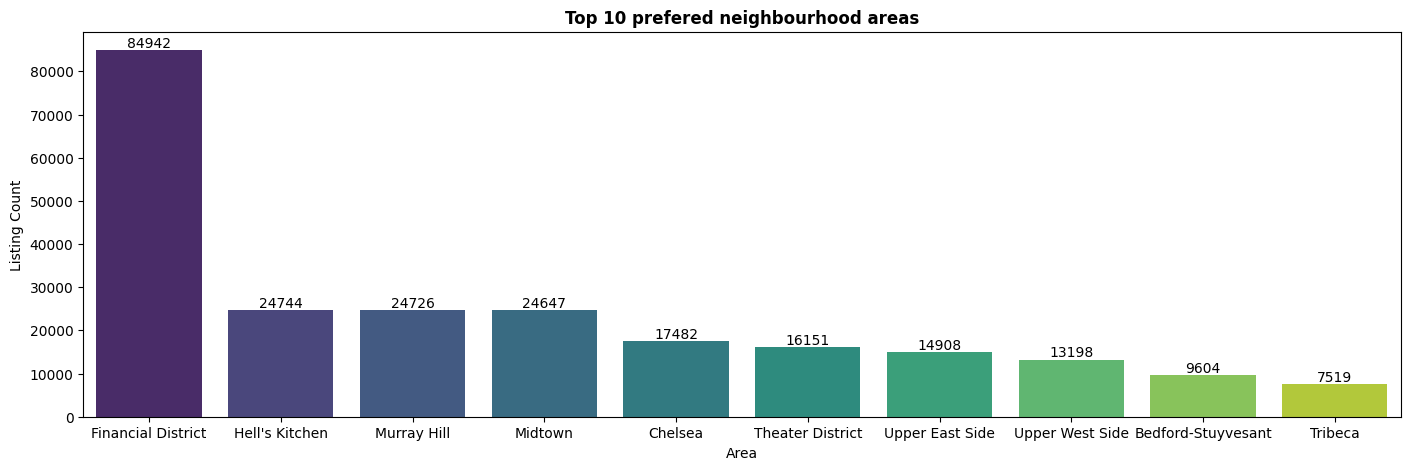

In [371]:
# Chart - 2 visualization code : Bar Chart
# As now we are having the price ranges with the most listings let us check the neighbourhoods with the most listings.

# Sort the data by 'Listing Count' in descending order and take the top 10 rows
df_top_10 = df_area.sort_values(by='Listing Count', ascending=False).head(10)
# Set up the figure
plt.figure(figsize=(17, 5))
# Define the color palette
# colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'cyan', 'brown', 'yellow', 'gray']
sns.barplot(data=df_top_10,x='Area',y='Listing Count',hue='Area',palette='viridis',legend=False)
plt.xlabel('Area')
plt.ylabel('Listing Count')
plt.title('Top 10 prefered neighbourhood areas',fontdict={'fontweight': 'bold', 'fontsize': 12})
# Add data labels
for x,y in zip(df_top_10['Area'],df_top_10['Listing Count']):
    plt.text(x,y,y,ha='center',va='bottom',fontsize=10)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a good choice to compare categorical data. In this case, the chart is used to compare the number of listings in different neighborhoods.



##### 2. What is/are the insight(s) found from the chart?

The chart shows that the top 10 neighborhoods have a significantly higher number of listings than the other neighborhoods. The most popular neighborhood, Financial District, has nearly 85,000 listings, while the least popular neighborhood, Tribeca, has only 7,519 listings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can help create a positive business impact. For example, businesses can focus their marketing efforts on the neighborhoods that are most popular with renters. Additionally, businesses can use this information to decide where to open new locations.

#### Chart - 3

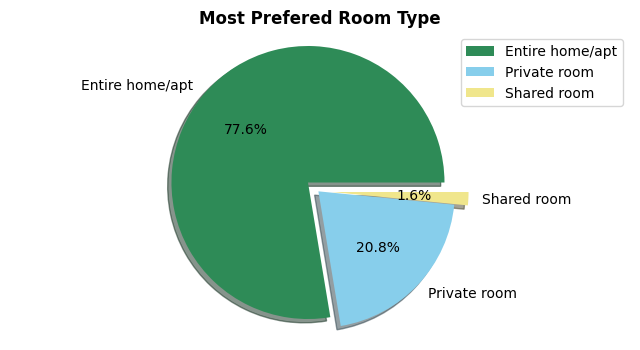

In [372]:
# Chart - 3 visualization code : Pie Chart
# Visualize the most prefered room type using a pie chart
# Set up the figure
plt.figure(figsize=(8, 4))
# colors = ['#b5651d', '#8b4513', '#deb887']
colors = ['#2e8b57', '#87ceeb', '#f0e68c']
plt.pie(df_room_group['Listing Count'], labels=df_room_group['Group'], autopct='%1.1f%%', explode=(0.1, 0, 0.1), shadow=True, colors=colors,
    startangle=360)
plt.title('Most Prefered Room Type', fontsize=12, fontweight='bold')
plt.axis('equal')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart was used because it shows the relative frequencies of their listing counts for each room type. It is easy to compare the percentage distribution established for each room type in this data visualization, allowing users to quickly determine the most and least popular room types.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that entire home/apartments are the most preferred room type, accounting for 77.6% of listings. Private rooms are the second most popular choice, at 20.8%, while shared rooms are the least popular, at 1.6%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Impact: Analysis of room type interests makes it easier to know the areas to market by and redesign the stock to reflect popular choices like ‘Entire home/apt.’

* Negative Growth: Offering too many rooms in the ‘Shared room’ category, or not offering an adequate number of rooms for the right price could harm a company since many rooms would likely remain empty.

* Justification: The separation of business goals from customers’ needs can lead to inefficient distribution of resources resulting in losses.


#### Chart - 4

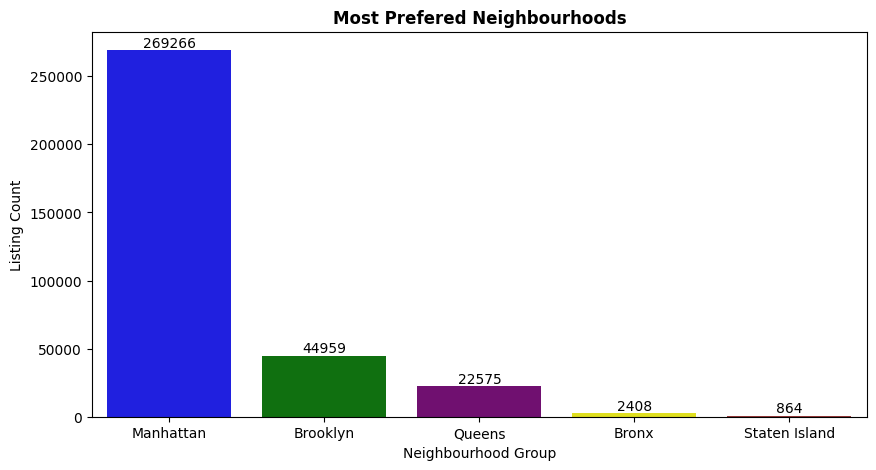

In [373]:
# Chart - 4 visualization code : Bar Chart
# To display only the top 10 neighborhoods in the bar chart based on the Listing Count

# Sort the data by 'Listing Count' in descending order and take the top 10 rows
df_sort = df_neighbour_group.sort_values(by='Listing Count', ascending=False)
# Set up the figure
plt.figure(figsize=(10, 5))
# Define the color palette
colors = ['blue', 'green', 'purple', 'yellow', 'brown']

sns.barplot(data=df_sort,x='Group',y='Listing Count',hue='Group',palette=colors,legend=False)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Listing Count')
plt.title('Most Prefered Neighbourhoods',fontdict={'fontweight': 'bold', 'fontsize': 12})
for x,y in zip(df_sort['Group'],df_sort['Listing Count']):
    plt.text(x,y,y,ha='center',va='bottom')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are well-suited for comparing categorical data. This chart specifically compares the number of listings in various neighborhoods.

##### 2. What is/are the insight(s) found from the chart?

Insignt that can be found from the chart:
* Manhattan has the most listings (around 450,000).
* Staten Island has the least listings (around 850).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Positive business impact: By understanding which neighborhoods have the most listings, businesses can target their marketing efforts to those areas. This can help them to reach a wider audience and increase their sales.

Negative business impact: If a business focuses only on the neighborhoods with the most listings, they may miss out on potential customers in other neighborhoods. It is important to consider other factors, such as demographics and psychographics, when targeting customers.

#### Chart - 5

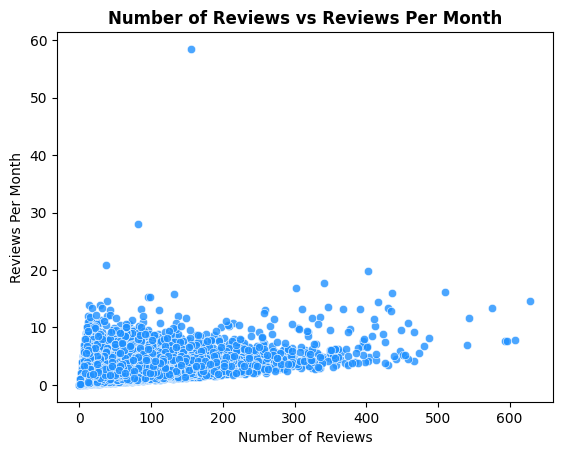

In [374]:
# Chart - 5 visualization code : Scatter Plot # number_of_reviews vs reviews_per_month
sns.scatterplot(data=df_feature, x='number_of_reviews',y='reviews_per_month',color='dodgerblue',alpha=0.8, )

# Add labels, title, and legend
plt.title('Number of Reviews vs Reviews Per Month', fontsize=12, fontweight='bold')
plt.xlabel('Number of Reviews', fontsize=10)
plt.ylabel('Reviews Per Month', fontsize=10)
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is the best choice to visualize the relationship between two continuous variables (number of reviews and reviews per month).

##### 2. What is/are the insight(s) found from the chart?

There is a positive correlation between the number of reviews and reviews per month. This means that businesses or products with more reviews tend to receive more reviews per month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes as we can seek out the difference from the given reviews and make specific recommendations to our hosts about what changes can be done by them in order to increase their reach to the customers. This can be one of our premium services that can widely help our hosts.

#### Chart - 6 - Correlation Heatmap

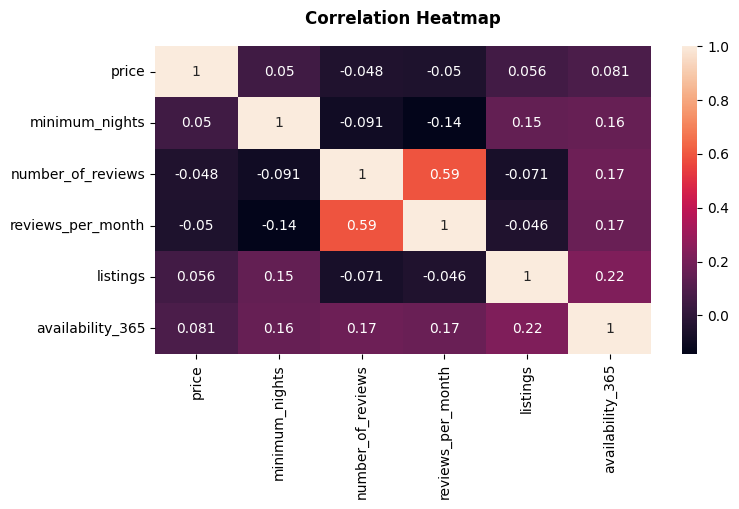

In [375]:
# Correlation Heatmap visualization code
df_feature.describe()

plt.figure(figsize=(8, 4))
df_heatmap= df_feature[['price', 'minimum_nights', 'number_of_reviews',
             'reviews_per_month', 'listings', 'availability_365']].corr()
# define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(df_heatmap))
hetmap1 = sns.heatmap(data = df_heatmap,annot=True)
hetmap1.set_title('Correlation Heatmap', fontdict={'fontsize':12,'fontweight': 'bold'}, pad=16);


##### 1. Why did you pick the specific chart?

As it allows to easily visualize the relationships among various numerical features, the correlation heatmap was chosen. This makes it easier for the user to appreciate the strength with which various variables are related which is important in comprehending the data and choosing features for further analysis.

##### 2. What is/are the insight(s) found from the chart?

The following conclusions can be drawn from the chart:

* Variables which have strong positive or negative correlations are selected for further studies (e.g., features which have high relation with price may be useful in making predictions).
* Very weak correlations denote features that are unlikely to affect one another, thus assisting in feature selection.
* For instance, availability_365 and number_of_reviews may have certain price trends that can be used in business strategies.

#### Chart - 7 - Pair Plot

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

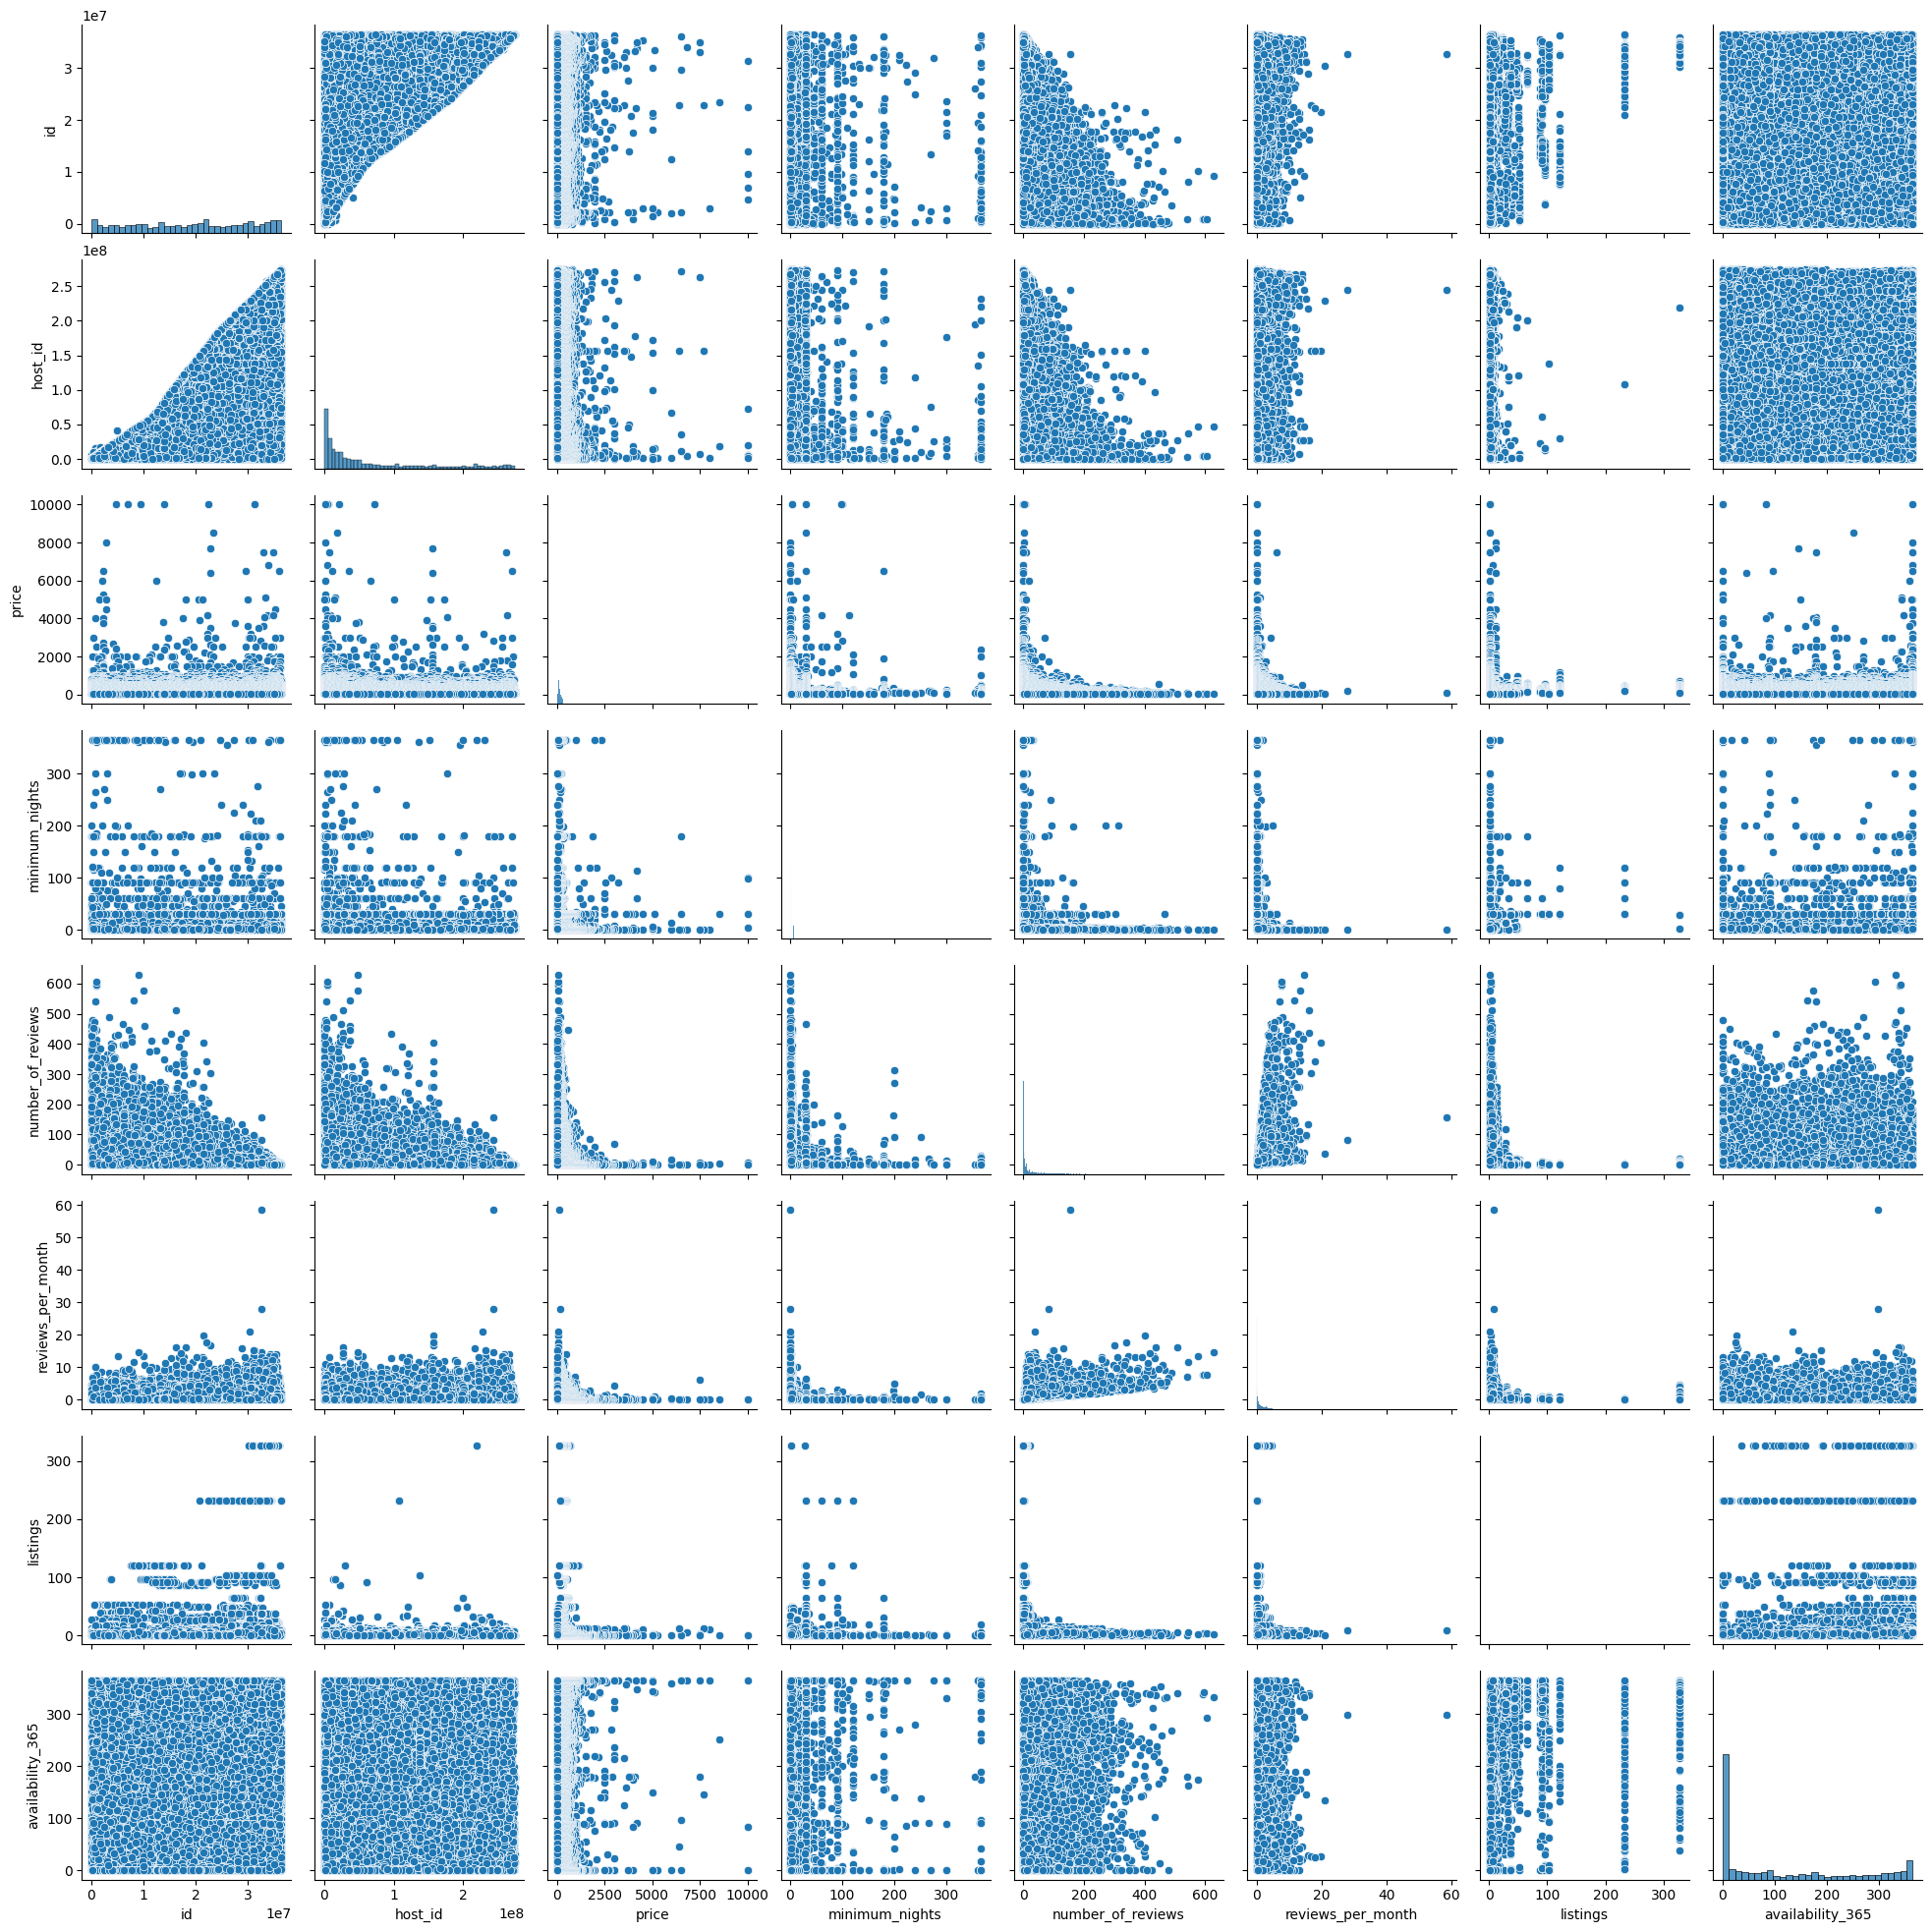

In [376]:
# Pair Plot visualization code
sns.pairplot(df_feature,palette='Set1')


##### 1. Why did you pick the specific chart?

Here we can easily see the distribution of our numerical variables, it will also give us an overview of our dataset and the relationships between our variables.

##### 2. What is/are the insight(s) found from the chart?

Yes, we can see that the utmost majority of our complete data set is within the price range of 0-2500.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. Optimize Pricing Strategy
 * Focus on the 0-300 price range, as it attracts the majority of customers.
 * Offer dynamic pricing based on demand, seasonality, and competitor analysis.

2. Enhance Privacy & Safety Policies
 * Since Entire home/apartment is the most preferred, prioritize security.
 * Highlight privacy features in listings to build customer trust.

3. Leverage Location Insights
 * Financial District (Manhattan) is the most popular; increase listings &
   promotions in this area.
 * Improve amenities & services in less preferred neighborhoods to attract more
   guests.

4. Improve Customer Experience Based on Reviews
 * Analyze top-reviewed listings to identify key satisfaction factors and
   replicate them across other properties.
 * Address common complaints to improve service quality.

5. Segment Customers for Personalized Marketing
 * Adding an occupation column can help identify guest preferences by industry.
 * Offer customized deals based on different customer segments (business
   travelers, tourists, families).

6. Expand Business Opportunities
 * Invest in high-demand areas while improving offerings in underperforming
   locations.
 * Encourage long-term stays with discounts for digital nomads & remote workers.

# **Conclusion**

The exploratory data analysis provides clear insights into customer preferences and demand patterns. Approximately 90% of our business activity is concentrated on specific areas, whether in terms of regional preferences or pricing. This saturation highlights what resonates with our customers. By leveraging these findings, we can strategically replicate successful elements across other areas to align with customer expectations and drive growth.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***